# HEART DISEASE DETECTION Using Supervised Machine Learning

**Data Description**: The csv file used in model contains date that set dates from 1988 and consists of four databases: Cleveland, Hungary, Switzerland, and Long Beach V. It contains 76 attributes, including the predicted attribute, but all published experiments refer to using a subset of 14 of them. The "target" field refers to the presence of heart disease in the patient. It is integer valued 0 = no disease and 1 = disease. 

**Context**: Model presented below helps the user to estimate whether he is prone to a heart disease or not.

**Attribute info**:  
age  <br> 
se <br> 
chest pain type (4 value <br>s)
resting blood pressure
serum cholestoral in m  /dl
fasting blood sugar > 120 mg/dl
resting electrocardiographic results (values 0,1,2)
maximum heart rate achieved
exercise induced angina
oldpeak = ST depression induced by exercise relative to rest
the slope of the peak exercise ST segment
number of major vessels (0-3) colored by flourosopy
thal: 0 = normal; 1 = fixed defect; 2 = reversable defect
The names and social security numbers of the patients were recently removed from the database, replaced with dummy values.
mmy values.



In [3]:
#importing packages
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeClassifier

In [4]:
#reading the data as dataframes and printing it
df=pd.read_csv("heart.csv")
df.info()
df.describe()
plt.show()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1025 entries, 0 to 1024
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1025 non-null   int64  
 1   sex       1025 non-null   int64  
 2   cp        1025 non-null   int64  
 3   trestbps  1025 non-null   int64  
 4   chol      1025 non-null   int64  
 5   fbs       1025 non-null   int64  
 6   restecg   1025 non-null   int64  
 7   thalach   1025 non-null   int64  
 8   exang     1025 non-null   int64  
 9   oldpeak   1025 non-null   float64
 10  slope     1025 non-null   int64  
 11  ca        1025 non-null   int64  
 12  thal      1025 non-null   int64  
 13  target    1025 non-null   int64  
dtypes: float64(1), int64(13)
memory usage: 112.2 KB


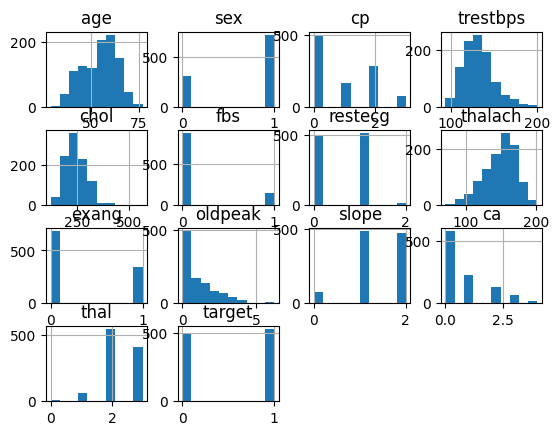

In [5]:
df.hist()
plt.show()

### Getting shape of data

In [6]:
# Get info of the dataframe columns
df.shape

(1025, 14)

###  Checking if data has any missing value

In [7]:
df.isnull().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

# Getting statistical info about data
 ### Performing exploratory data analysis on heart disease data set

In [8]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
age,1025.0,54.434146,9.072290,29.0,48.0,56.0,61.0,77.0
sex,1025.0,0.695610,0.460373,0.0,0.0,1.0,1.0,1.0
cp,1025.0,0.942439,1.029641,0.0,0.0,1.0,2.0,3.0
trestbps,1025.0,131.611707,17.516718,94.0,120.0,130.0,140.0,200.0
chol,1025.0,246.000000,51.592510,126.0,211.0,240.0,275.0,564.0
fbs,1025.0,0.149268,0.356527,0.0,0.0,0.0,0.0,1.0
restecg,1025.0,0.529756,0.527878,0.0,0.0,1.0,1.0,2.0
thalach,1025.0,149.114146,23.005724,71.0,132.0,152.0,166.0,202.0
exang,1025.0,0.336585,0.472772,0.0,0.0,0.0,1.0,1.0
oldpeak,1025.0,1.071512,1.175053,0.0,0.0,0.8,1.8,6.2


### Checking about distribution of data variable


In [9]:
df['target'].value_counts()

target
1    526
0    499
Name: count, dtype: int64

Where "1" denotes defective heart and
"0: denotes healthy one

# Splitting the features and target 

In [10]:
X=df.drop(columns='target',axis=1)
Y=df['target']

In [11]:
print(X)

      age  sex  cp  trestbps  chol  fbs  restecg  thalach  exang  oldpeak  \
0      52    1   0       125   212    0        1      168      0      1.0   
1      53    1   0       140   203    1        0      155      1      3.1   
2      70    1   0       145   174    0        1      125      1      2.6   
3      61    1   0       148   203    0        1      161      0      0.0   
4      62    0   0       138   294    1        1      106      0      1.9   
...   ...  ...  ..       ...   ...  ...      ...      ...    ...      ...   
1020   59    1   1       140   221    0        1      164      1      0.0   
1021   60    1   0       125   258    0        0      141      1      2.8   
1022   47    1   0       110   275    0        0      118      1      1.0   
1023   50    0   0       110   254    0        0      159      0      0.0   
1024   54    1   0       120   188    0        1      113      0      1.4   

      slope  ca  thal  
0         2   2     3  
1         0   0     3  
2  

In [12]:
print(Y)

0       0
1       0
2       0
3       0
4       0
       ..
1020    1
1021    0
1022    0
1023    1
1024    0
Name: target, Length: 1025, dtype: int64


# Splitting the data into training and test data

In [13]:
X_train,X_test,Y_train,Y_test= train_test_split(X,Y, test_size=0.2,stratify=Y, random_state=5)
print(X.shape,X_train.shape,X_test.shape)

(1025, 13) (820, 13) (205, 13)


# MODEL TRAINING

### Using logistic regression

In [14]:
model=LogisticRegression()

### training the logistic model with training data

In [15]:
model.fit(X_train,Y_train)

C:\Users\sumit rai\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

# Model evaluation

In [16]:
X_test_prediction= model.predict(X_test)
test_data_accuracy=accuracy_score(X_test_prediction, Y_test)

In [17]:
print("Accuracy found on test data is = ",test_data_accuracy)

Accuracy found on test data is =  0.8634146341463415


# Building a predictive system


The score for Decision Tree Classifier is  98.53658536585365 %


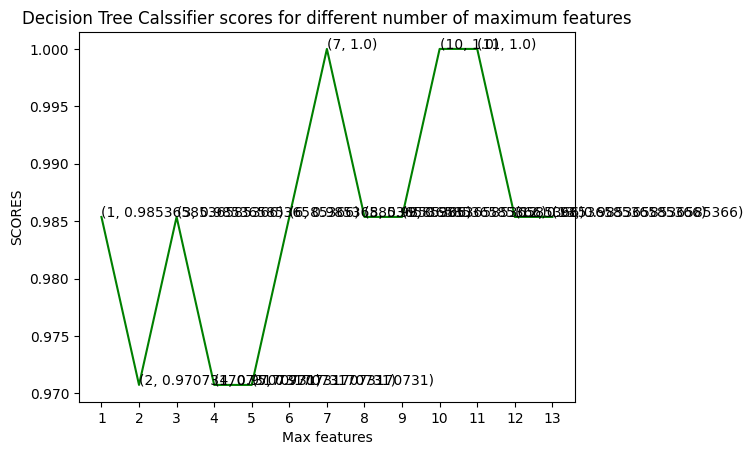

In [18]:
 #using Decision Tree Classifier
dt_scores =[]
for i in range(1,len(X.columns)+1):
    dt_classifier = DecisionTreeClassifier(max_features=i,random_state=0)
    dt_classifier.fit(X_train,Y_train)
    dt_scores.append(dt_classifier.score(X_test,Y_test))

#selected maximum number of features from 1to 13 for split
plt.plot([i for i in range(1,len(X.columns)+1)],dt_scores,color = "green")
for i in range(1,len(X.columns)+1) :
    plt.text(i,dt_scores[i-1],(i,dt_scores[i-1]))
    plt.xticks([i for i in range(1,len(X.columns)+1)])
    plt.xlabel('Max features')
    plt.ylabel('SCORES')
    plt.title('Decision Tree Calssifier scores for different number of maximum features')
print("The score for Decision Tree Classifier is ",format(dt_scores[11]*100),"%")
plt.show()


In [19]:

#input_data=(34,0,1,118,210,0,1,192,0,0.7,2,0,2)
#changing input data into numpy array
input_data=[]
x=int(input("enter ur age: "))
input_data.append(x)
x=int(input("enter ur gender-either 1 or 0, 1 for male,0 for female: "))
input_data.append(x)
x=int(input("enter ur chest pain from range of 0-3: "))
input_data.append(x)
x=int(input("enter resting blood pressure: "))
input_data.append(x)
x=int(input("enter serum cholestoral in mg/dl: "))
input_data.append(x)
x=int(input("enter fasting blood sugar > 120 mg/dl: "))
input_data.append(x)
x=int(input("enter resting electrocardiographic results (values 0,1,2): "))
input_data.append(x)
x=int(input("enter maximum heart rate achievedl: "))
input_data.append(x)
x=int(input("enter exercise induced angina: "))
input_data.append(x)
x=float(input("enter oldpeak = ST depression induced by exercise relative to rest: "))
input_data.append(x)
x=int(input("enter the slope of the peak exercise ST segment"))
input_data.append(x)
x=int(input("enter number of major vessels (0-3) colored by flourosopy: "))
input_data.append(x)
x=int(input("thal: 0 = normal; 1 = fixed defect; 2 = reversable defect: "))
input_data.append(x)
#print("ur age is ",input_data[1]) 
new_input_data=np.asarray(input_data)
reshaped_input=new_input_data.reshape(1,-1)
prediction= model.predict(reshaped_input)
print("\n")
if(prediction[0]==0):
    print("USING PREDICTED MODEL,USER HAS HEALTHY HEART THUS NO HEART DISEASE\n")
else :
    print("USING PREDICTED MODEL,USER HAS A HEART DISEASE\n")



enter ur age:  20
enter ur gender-either 1 or 0, 1 for male,0 for female:  1
enter ur chest pain from range of 0-3:  2
enter resting blood pressure:  118
enter serum cholestoral in mg/dl:  210
enter fasting blood sugar > 120 mg/dl:  0
enter resting electrocardiographic results (values 0,1,2):  1
enter maximum heart rate achievedl:  192
enter exercise induced angina:  0
enter oldpeak = ST depression induced by exercise relative to rest:  0.6
enter the slope of the peak exercise ST segment 2
enter number of major vessels (0-3) colored by flourosopy:  0
thal: 0 = normal; 1 = fixed defect; 2 = reversable defect:  3




USING PREDICTED MODEL,USER HAS A HEART DISEASE



C:\Users\sumit rai\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(
